# Business Understanding
Tahap ini melibatkan pemahaman terhadap tujuan bisnis dan kebutuhan yang ingin dicapai melalui analisis data.  perlu memahami masalah yang ingin diselesaikan, sasaran yang ingin dicapai, serta membangun pemahaman tentang bagaimana analisis data dapat memberikan nilai tambah bagi bisnis.

Berdasarkan file dataset "classast - pha" yang di dapat dari situs https://www.kaggle.com/datasets/brsdincer/orbitclassification?select=classast+-+pha.csv, dapat diasumsikan bahwa dataset ini berisi data terkait orbit. orbit adalah lintasan teratur dan berulang yang dilewati suatu benda di ruang angkasa mengelilingi benda angkasa lainnya. Dataset ini dapat digunakan untuk memahami karakteristik orbit objek astronomi seperti asteroid, komet, atau benda langit lainnya. Dengan menganalisis atribut seperti jarak semimayor, eksentrisitas, inklinasi orbit, dan argumen lainnya, informasi penting tentang orbit dan jalur objek astronomi dapat ditemukan. Para peneliti dan ilmuwan dapat menggunakan dataset ini untuk mengembangkan penelitian dan pemodelan lebih lanjut tentang orbit objek astronomi. Informasi tentang klasifikasi orbit, jarak semimayor, dan atribut lainnya dapat membantu memahami pergerakan objek-objek astronomi dalam Tata Surya.

In [1]:
import pandas as pd
import numpy as np

# Data Understanding
Tahap ini melibatkan pemahaman mendalam tentang data yang tersedia untuk analisis.  perlu mengeksplorasi, mengevaluasi, dan memahami karakteristik, struktur, serta kualitas data yang ada. Hal ini melibatkan eksplorasi dataset, identifikasi variabel dan atribut yang relevan, serta pemahaman terhadap hubungan antara data yang ada.

dari dataset tersebut didapat informasi tentang atribut yang spesifik dalam dataset "classast - pha.csv" dari situs Kaggle.berdasarkan pola umum dalam klasifikasi orbit objek astronomi, beberapa atribut tersebut mungkin mengacu pada kategori orbit tertentu atau jenis objek dalam dataset. Berikut adalah penjelasan umum tentang kemungkinan arti atribut-atribut tersebut:

Berikut adalah atribut-atribut yang terdapat dalam dataset "classast - pha.csv":

1. a (AU): Jarak semimayor objek astronomi dalam satuan astronomi (AU).
2. e: Eksentrisitas orbit objek astronomi.
3. i (deg): Inklinasi orbit objek astronomi dalam derajat.
4. w (deg): Argumen perihelion objek astronomi dalam derajat.
5. Node (deg): Longitudinal node objek astronomi dalam derajat.
6. M (deg): Anomali rata-rata objek astronomi dalam derajat.
7. q (AU): Jarak perihelion objek astronomi dalam satuan astronomi (AU).
8. Q (AU): Jarak aphelion objek astronomi dalam satuan astronomi (AU).
9. P (yr): Periode orbit objek astronomi dalam tahun.
10. H (mag): Magnitudo absolut objek astronomi.
11. MOID (AU): Minimum Orbit Intersection Distance, jarak terdekat antara orbit objek astronomi dengan orbit Bumi dalam satuan astronomi (AU).
12. class: Kelas atau kategori klasifikasi orbit objek astronomi.

Di dalam atribut class ada beberapa rincian mengenai klasifikasi yang akan menjadi targetan yait:

1. AMO*: merujuk pada Asteroid Main Belt (AMO) yang merupakan kelompok asteroid yang terletak di sabuk utama Tata Surya antara orbit Mars dan Jupiter.
2. APO: merujuk pada Asteroid Perihelion Object (APO), yang mengacu pada asteroid yang memiliki perihelion (titik terdekat dengan Matahari) di dalam orbit Bumi.
3. APO*: merujuk pada kelompok Asteroid Aten (APO*), yang terdiri dari asteroid dengan orbit yang lebih dekat dengan Matahari daripada Bumi.
4. ATE: merujuk pada Asteroid Apohele (ATE), yang mengacu pada asteroid yang memiliki apoheleon (titik terjauh dari Matahari) di dalam orbit Bumi.
5. ATE*: merujuk pada kelompok Asteroid Atira (ATE*), yang terdiri dari asteroid dengan orbit yang lebih dekat dengan Matahari daripada Bumi, dengan apoheleon yang berada di dalam orbit Bumi.
6. IEO*: merujuk pada kelompok Inner-Earth Object (IEO*), yang terdiri dari objek astronomi dengan orbit yang sepenuhnya berada di dalam orbit Bumi.


# load dataset

In [2]:
df = pd.read_csv('classast - pha.csv')
df.sample()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),class
197,1.09212,0.575343,6.498692,45.923483,341.22854,91.012747,0.4638,1.72,1.14,18.8,0.032765,APO*


In [3]:
df.sample()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),class
1554,2.738322,0.748101,10.363827,80.653281,3.3062,166.712518,0.6898,4.79,4.53,19.8,0.019987,APO*


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a (AU)      1748 non-null   float64
 1   e           1748 non-null   float64
 2   i (deg)     1748 non-null   float64
 3   w (deg)     1748 non-null   float64
 4   Node (deg)  1748 non-null   float64
 5   M (deg)     1748 non-null   float64
 6   q (AU)      1748 non-null   float64
 7   Q (AU)      1748 non-null   float64
 8   P (yr)      1748 non-null   float64
 9   H (mag)     1748 non-null   float64
 10  MOID (AU)   1748 non-null   float64
 11  class       1748 non-null   object 
dtypes: float64(11), object(1)
memory usage: 164.0+ KB


In [5]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    elif df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
numerical

['a (AU)',
 'e',
 'i (deg)',
 'w (deg)',
 'Node (deg)',
 'M (deg)',
 'q (AU)',
 'Q (AU)',
 'P (yr)',
 'H (mag)',
 'MOID (AU)']

In [7]:
catgcols

['class']

In [8]:
df['class'].value_counts()

APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: class, dtype: int64

In [9]:
df['class'].value_counts()

APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: class, dtype: int64

In [10]:
ind_col = [col for col in df.columns if col !='class']
dep_col = 'class'

In [11]:
df[dep_col].value_counts()

APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: class, dtype: int64

# Data Preparation 
Tahap ini melibatkan persiapan data untuk analisis lebih lanjut. Proses ini mencakup pembersihan data, penggabungan data dari berbagai sumber, transformasi data, serta pemilihan atribut yang relevan. Tujuannya adalah memastikan data siap untuk digunakan dalam proses analisis.

berikut adalah data preparation pada file dataeset classast - pha.csv yaitu diantaranya:
1. transformasi dataset
2. rename kolom dataset
3. split dataset


# transformasi dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [13]:
df['class'] = le.fit_transform(df['class'])

In [14]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [15]:
df = df.rename(columns={"a (AU)":"a_AU","i (deg)":"i_deg","w (deg)":"w_deg","Node (deg)":"Node_deg","M (deg)":"M_deg","q (AU)":"q_AU","Q (AU)":"Q_AU","P (yr)":"P_yr","H (mag)":"H_mag","MOID (AU)":"MOID_AU"})

In [16]:
df.head()

,a_AU,e,i_deg,w_deg,Node_deg,M_deg,q_AU,Q_AU,P_yr,H_mag,MOID_AU,class
0,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,1.12,16.90,0.034507,2
1,1.245304,0.335342,13.337482,276.893024,337.207958,104.155607,0.8277,1.66,1.39,15.60,0.030669,2
2,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,1.78,16.25,0.025795,2
3,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,2.37,15.20,0.003551,2
4,1.874123,0.764602,1.326399,43.388048,349.694944,235.158622,0.4412,3.31,2.57,18.80,0.011645,2


In [17]:
df.to_csv('classastClean.csv', index=False)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Modeling 
Tahap ini melibatkan pengembangan model atau teknik analisis yang sesuai untuk mencapai tujuan bisnis yang telah ditetapkan. Ini melibatkan penerapan algoritma atau teknik analisis yang sesuai, pengaturan parameter model, dan evaluasi kinerja model.

Modeling disini menggunakan algoritma decision tree untuk mengetahui  kategori klasifikasi orbit objek astronomi. dengan inputana_AU,e,i_deg,w_deg,Node_deg,M_deg,q_AU,Q_AU,P_yr,H_mag,MOID_AU,class sebagai atribut fitur dan "class" sebagai atribut target prediksi. prediksi yang diambil yaitu Asteroid Main Belt (AMO*), Asteroid Perihelion Object (APO), 'kelompok Asteroid Aten (APO*), Asteroid Apohele (ATE), kelompok Asteroid Atira (ATE*), Inner-Earth Object (IEO*). model yang digunakan adalah klasifikasi orbit dengan algoritma decision tree.


# Evaluation 
Tahap ini melibatkan evaluasi hasil dari model atau analisis yang telah dilakukan. Anda perlu mengevaluasi keefektifan dan kualitas model dalam mencapai tujuan bisnis yang ditetapkan. Evaluasi dapat melibatkan metrik performa, validasi silang, atau pengujian statistik.

kinerja model dievaluasi menggunakan metrik evaluasi yang sesuai. Dalam kasus ini, beberapa metrik evaluasi yang dapat digunakan adalah:

1. Akurasi (accuracy): Mengukur sejauh mana model dapat memprediksi dengan benar. Akurasi dihitung dengan membagi jumlah prediksi yang benar dengan total jumlah prediksi.
2. Presisi (precision): Mengukur sejauh mana prediksi positif yang diberikan oleh model adalah benar. Presisi dihitung dengan membagi jumlah prediksi positif yang benar dengan jumlah prediksi positif yang dilakukan.
3. Recall (sensitivitas): Mengukur sejauh mana model dapat mengidentifikasi secara benar kasus positif. Recall dihitung dengan membagi jumlah prediksi positif yang benar dengan jumlah kasus positif yang sebenarnya.
4. F1-score: Menggabungkan presisi dan recall untuk memberikan ukuran keseluruhan kinerja model. F1-score adalah harmonic mean dari presisi dan recall.
5. Support: Support mengindikasikan jumlah sampel dalam kelas target yang terkait. Ini dapat memberikan wawasan tentang seberapa seimbang atau tidak seimbangnya dataset. Nilai support dihitung sebagai jumlah kasus aktual dalam setiap kelas.

# membuat model decision tree

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))

print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 1.0
akurasi data testing = 0.9971428571428571 

confusion matrix : 
[[ 18   0   1   0   0   0]
 [  0   4   0   0   0   0]
 [  0   0 289   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0  35   0]
 [  0   0   0   0   0   1]]

classification report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00       289
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00         1

    accuracy                           1.00       350
   macro avg       1.00      0.99      1.00       350
weighted avg       1.00      1.00      1.00       350



In [20]:
df[dep_col].value_counts()

2    1477
4     149
0      96
1      14
3       7
5       5
Name: class, dtype: int64

# simulasi model

In [21]:
input_data = (0.79675676,0.777469595,25.3976258,212.4317231,30.2824655,279.3638474,0.1773,1.42,0.71,19.9,0.026656)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Asteroid Main Belt (AMO*)')
elif (prediction[0]==1):
    print ('Asteroid Perihelion Object (APO)')
elif (prediction[0]==2):
    print ('kelompok Asteroid Aten (APO*)')
elif (prediction[0]==3):
    print ('Asteroid Apohele (ATE)')
elif (prediction[0]==4):
    print ('kelompok Asteroid Atira (ATE*)')
else:
    print ('Inner-Earth Object (IEO*)')

[4]
kelompok Asteroid Atira (ATE*)


c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# visualisasi pohon keputusan

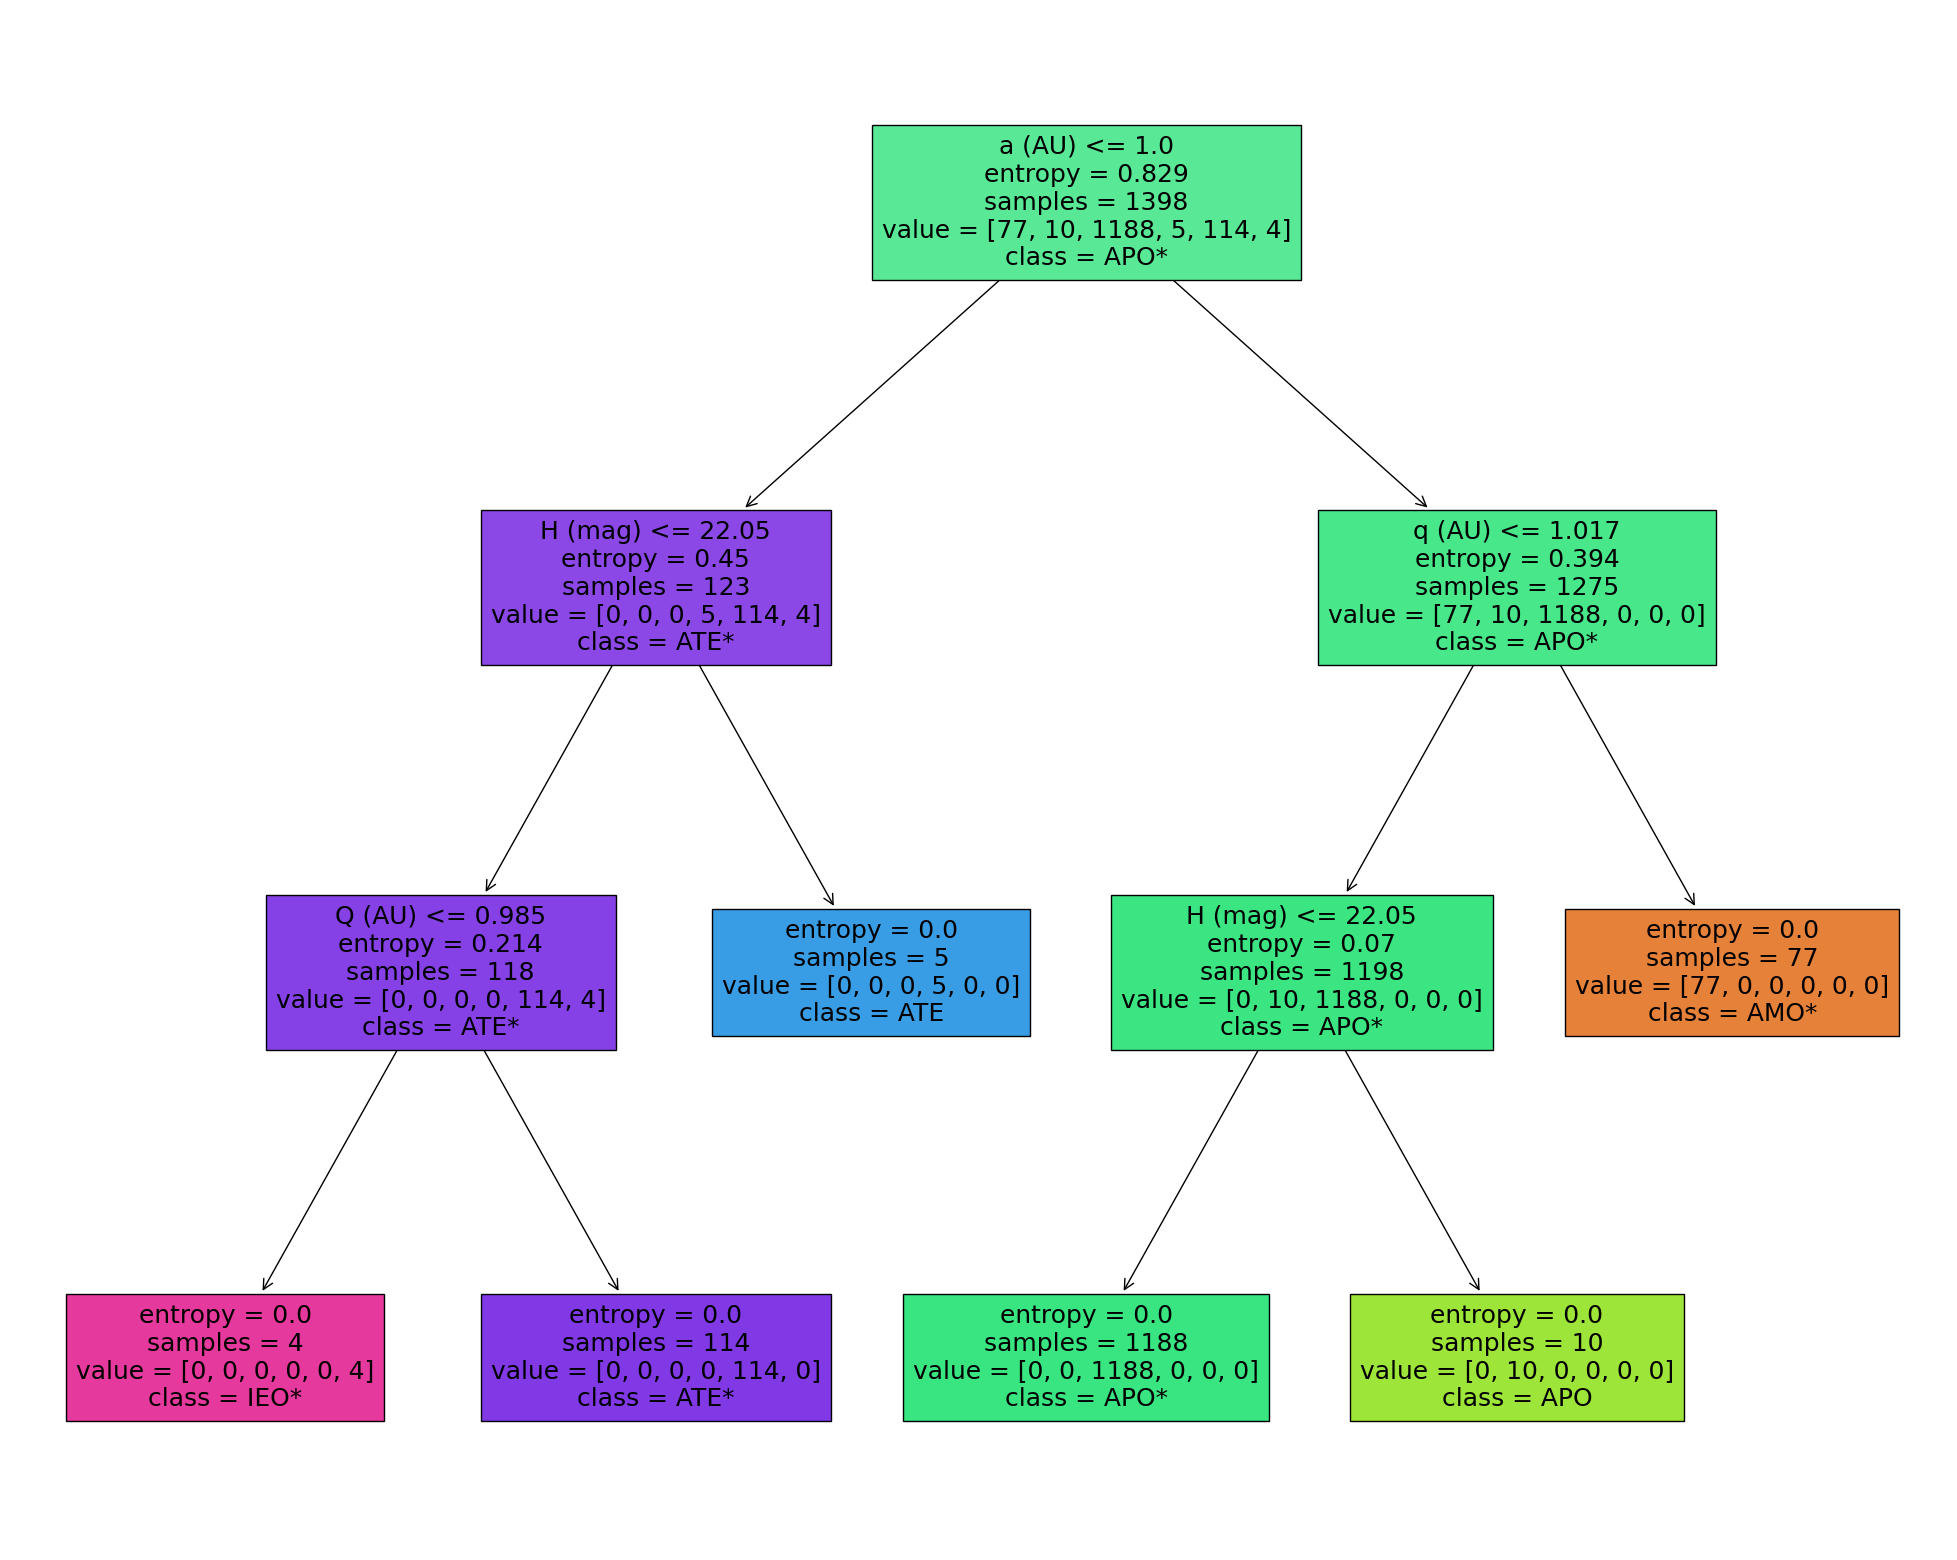

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['AMO*','APO','APO*','ATE','ATE*','IEO*'],
                   filled=True)         

# Deployment 
Tahap ini melibatkan implementasi hasil analisis data ke dalam lingkungan bisnis. Hasil dan wawasan yang diperoleh dari analisis data diterapkan dalam konteks bisnis yang sesuai. Ini dapat melibatkan pembuatan laporan, pengembangan aplikasi, atau penggunaan wawasan untuk pengambilan keputusan. 

Setelah melakukan tahap tahap dalam crips dm terakhir yaitu mengimplementasikannya dalam bentuk file csv yang sudah sesuai dengan model algortima decision tree pada codingan df.to_csv('classastClean.csv', index=False). implementasi ini menggunakan streamlit.